In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.cluster import KMeans

In [4]:
# X = np.load('X_total_ceew.npy')
X = np.load('Xmeterav_total_ceew.npy')
# X = np.load('/content/drive/My Drive/Colab/EI_conf/DeepLearn/X_total_ceew.npy')

In [5]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler


In [6]:
def plot(cluster_centers, name):
    plt.figure(figsize=(12, 6))
    for i, center in enumerate(cluster_centers):
        plt.plot(center, label=f'Cluster {i}')

    plt.title('Cluster Centroids of Hourly Load Curves ' + name)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()    

In [7]:
def kshape(X, n_clusters):
    
    X_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X)
    ks = KShape(n_clusters=n_clusters, verbose=False, random_state=0)
    ks_cluster_assignments = ks.fit_predict(X_scaled)
    ks.cluster_centers_.shape
    
    cluster_centers = ks.cluster_centers_
    return cluster_centers, ks_cluster_assignments

## k-shape

In [8]:
import kshape
import numpy as np
from kshape.core import KShapeClusteringCPU 

In [10]:
X1 = X
X2 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2.shape

(84, 24, 1)

In [32]:
n_clusters = 4

In [12]:
# CPU Model

# ksc = KShapeClusteringCPU(n_clusters, centroid_init='zero', max_iter=100, n_jobs=-1)
# X2a = TimeSeriesScalerMeanVariance().fit_transform(X2)
# ksc.fit(X2a)
# labels = ksc.labels_ # or ksc.predict(univariate_ts_datasets)
# cluster_centroids = ksc.centroids_


In [13]:
#TS learn

# X2a = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
# ksc = KShape(n_clusters=n_clusters, verbose=False, random_state=0)
# ksc.fit(X2a)
# labels = ksc.labels_
# ksc.cluster_centers_.shape
# cluster_centroids = ksc.cluster_centers_

In [14]:
# DBA K-means

X2a = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
dba_km = TimeSeriesKMeans(n_clusters=4,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          n_jobs = 10,
                          max_iter_barycenter=10,
                          random_state=0)
dba_km.fit(X2a)
labels = dba_km.labels_
dba_km.cluster_centers_.shape
cluster_centroids = dba_km.cluster_centers_


Init 1


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.2s
[Parallel(n_jobs=10)]: Done  84 out of  84 | elapsed:    3.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Do

6.135 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


4.435 --> 

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s


4.418 --> 4.418 --> 
Init 2


[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  84 out of  84 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs

6.639 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


4.724 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


4.596 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


4.519 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s


4.441 --> 4.441 --> 


[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


In [31]:
n_clusters

3

In [33]:
for i in range(n_clusters):
    num_points_in_cluster = len(X2a[labels == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 25 data points
Cluster 1: 47 data points
Cluster 2: 7 data points
Cluster 3: 5 data points


In [34]:
xc = cluster_centroids
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

In [35]:
df_c

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.247182,0.774949,0.368938,-0.223511,-1.168604,-0.560305,0.486969,-0.316478,-0.943308,-0.692846,...,-0.756705,-0.759593,-0.759593,-0.851660,-0.710829,-0.333074,0.266126,1.092540,1.777648,1.470972
1,0.332895,0.022107,-0.320539,-0.770137,-1.106117,-1.902781,-1.876065,-2.145384,-1.535308,-0.846914,...,0.286112,0.997644,1.078137,1.078137,1.078137,1.052303,1.460239,0.800053,0.756587,0.208794
2,-0.878542,-1.191379,-1.176619,-1.150124,-1.152528,-1.170107,-0.913651,-0.216068,1.166954,0.881500,...,2.017502,1.083869,0.107002,-0.577907,-0.398841,-0.237088,0.704736,-0.054452,-0.471724,-0.925835
3,-0.273734,0.420891,0.191353,-0.511027,0.351095,1.825303,3.121973,0.576498,-0.033938,-0.373271,...,-0.633432,-0.645162,-0.667786,-0.934498,-0.690437,-0.675361,-0.163751,0.851059,0.198551,-0.496262


<Axes: >

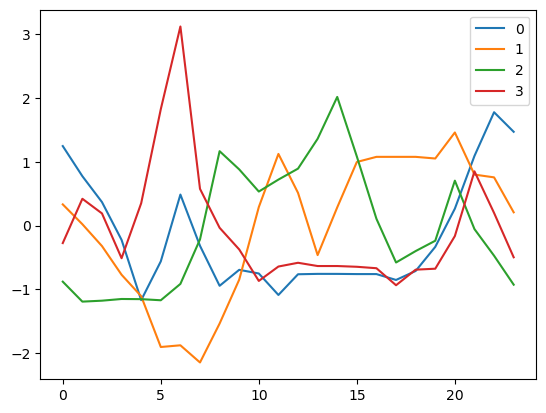

In [36]:
df_c.T.plot()

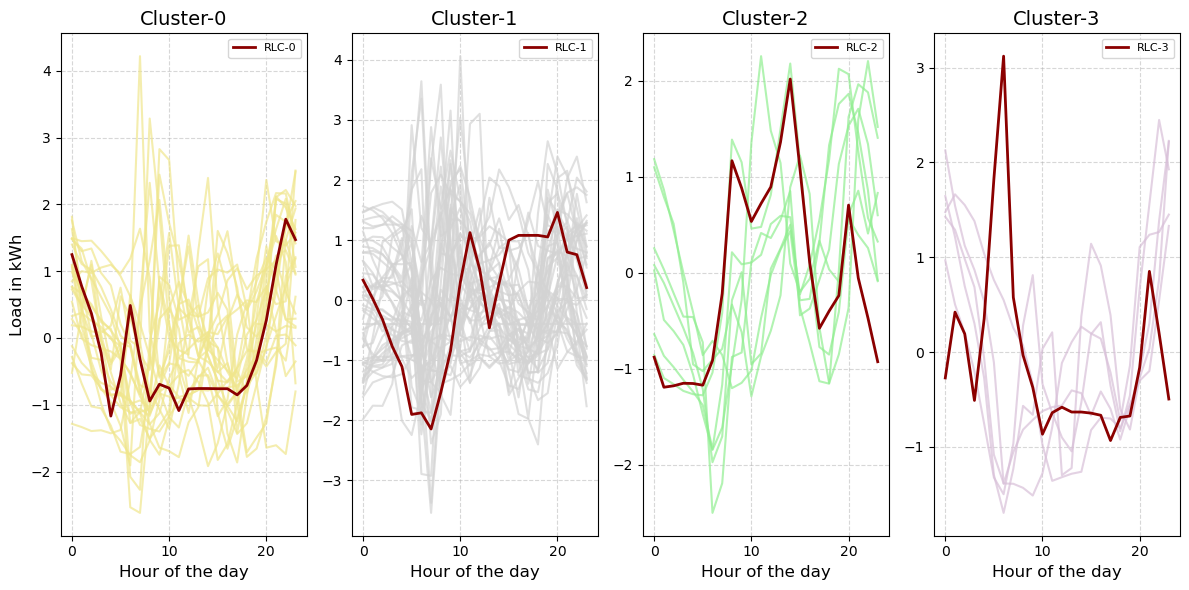

In [37]:
plt.figure(figsize=(12, 6))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2a.reshape((X2a.shape[0], X2a.shape[1]))
    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
#     plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()


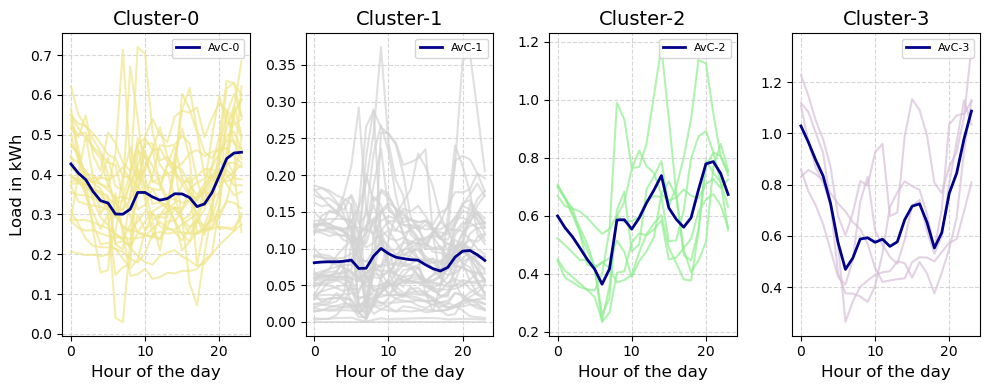

In [38]:
plt.figure(figsize=(10, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2a.shape[0], X2a.shape[1]))
    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()


In [39]:
labels = dba_km.fit_predict(X2b)

Init 1


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  84 out of  84 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Do

0.178 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


0.086 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


0.079 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s


0.077 --> 0.077 --> 
Init 2


[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  84 out of  84 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 252 out of 252 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs

0.159 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


0.093 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


0.079 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s


0.078 --> 0.078 --> 

[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


0.078 --> 


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 336 out of 336 | elapsed:    0.0s finished


In [40]:
labels

array([1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1], dtype=int64)

In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_score(X2b, labels)

0.5593412671356204

In [42]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
silhouette_score(X2b, labels,metric=dtw)

0.6059182539509307

In [43]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X2b, labels)

145.8414893597379

In [44]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X2b, labels)

1.077973665166316

In [45]:
#SBD
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(np.mean(X1[labels == j],axis=0), X1[labels == j][i,:])
        
print(k)

35.02558522257769


In [46]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X2b[labels == j], axis=1) 
    peak_rlc = np.argmax(xc[j, :])
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

8.0 0.09523809523809523


In [47]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(dmd_pk, axis=0)
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

9.0 0.10714285714285714


NameError: name 'euclidean_distances' is not defined

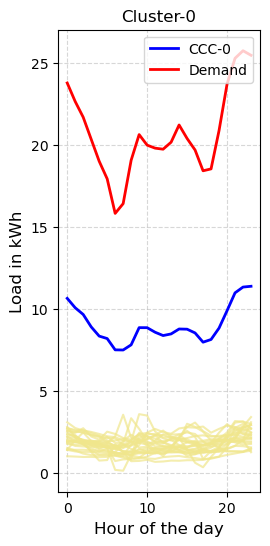

In [48]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(3):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X1[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
# plt.savefig("final/cc_kshape.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
#Shape based distance
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(xc[j, :].T, X2b[labels == j][i,:].reshape(1,-1))
print(k)

In [ ]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    
    x1 = X1[labels == j]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
    peak_dem = np.argmax(dmd_pk, axis=0)
    c[j,peak_dem] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
#         print(i,peak_dem,c,y)
    l = l + len(X[labels == j])
    print(peaks_indices,pm)
print(pm, peak_dem)